In [1]:
import sys
import os
sys.path.append(os.path.abspath('../..'))

from utlis.sync_utlis.sync_df_utlis import process_sync


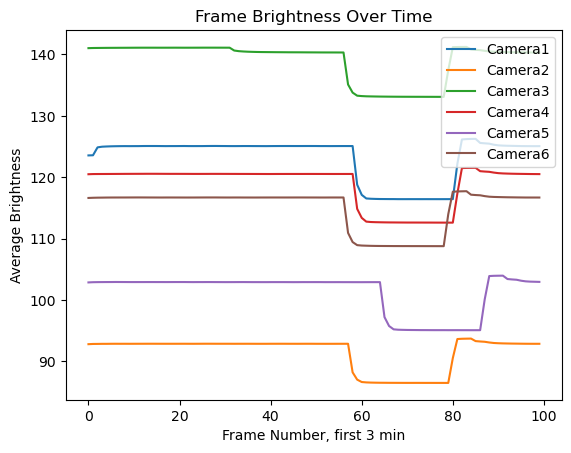

Detected intensity drop frames in /home/lq53/mir_data/sync_test/rawvid_mirstop_30s_light_3: {'Camera1': [59], 'Camera2': [58], 'Camera3': [57], 'Camera4': [59], 'Camera5': [65], 'Camera6': [57]}
alined data saved to: /home/lq53/mir_data/sync_test/rawvid_mirstop_30s_light_3/df_synced_rawvid_mirstop_30s_light_3_30s_exposuretest_label3d_dannce.mat
Alignment successful for /home/lq53/mir_data/sync_test/rawvid_mirstop_30s_light_3
Moved prior calibration file to /home/lq53/mir_data/sync_test/rawvid_mirstop_30s_light_3/prev_calib


In [3]:
# base_folder = '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3'

base_folder = '/home/lq53/mir_data/sync_test/rawvid_mirstop_30s_light_3'

process_sync(base_folder, threshold=3, max_frames=100)

In [ ]:
# also adding the exe generation for mir_generate param, for future references:
import sys
import os
sys.path.append(os.path.abspath('../..'))

from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z

# base_path = 'G:/Videos/6cam/lq53/2024_09_16_test_chris_new/'
# calib_path = os.path.join(base_path, 'calib_before_3/chris_new/')
# vid_path = 'rec_test_1'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)